In [17]:
#TOPIC : CREDIT CARD FRAUD DETECTION
'''
COMPONENTS / MODULES -- 
NAIVE BAYES CLASSIFIER
'''

'\nCOMPONENTS / MODULES -- \nNAIVE BAYES CLASSIFIER\n'

In [18]:
#This is a Gaussian Naive Bayes Classification


#Lets start with importing packages

import numpy as ny
import pandas as ps
import matplotlib.pyplot as pylt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [19]:
# Loading .CSV file
cred = ps.read_csv("D:\Projects\UnderGradProjects\Credit Card Fraud Detection System _ A Comparison study on various Machine Learning and Deep Learning Algorithms\creditcard.csv")

In [20]:
# Lets get the shape of the dataset
print(cred.shape)

(284807, 31)


In [21]:
# Obatining initial rows
print(cred.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [22]:
#Describing dataset
print(cred.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

In [23]:
#Dataset Information
print(cred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

PIE CHART OF THE CLASS


Text(0, 0.5, '')

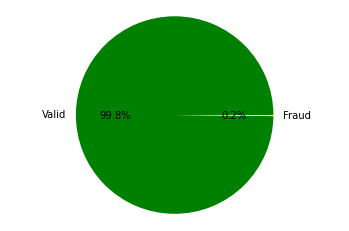

In [24]:
#Lets check for 0 and 1 , for valid and fraudulant transactions , respectively

print("PIE CHART OF THE CLASS")
fig, ax = pylt.subplots(1, 1)
ax.pie(cred.Class.value_counts(),autopct='%1.1f%%', labels=['Valid','Fraud'], colors=['green','yellow'])
pylt.axis('equal')
pylt.ylabel('')

In [25]:
#Here the percentage of frauds is 0.2% which is the approximate result of 0.17%
#obtained from other models' code

TIME FEATURE
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: HOURS, dtype: float64


Text(0, 0.5, 'NUMBER OF TRANSACTTIONS')

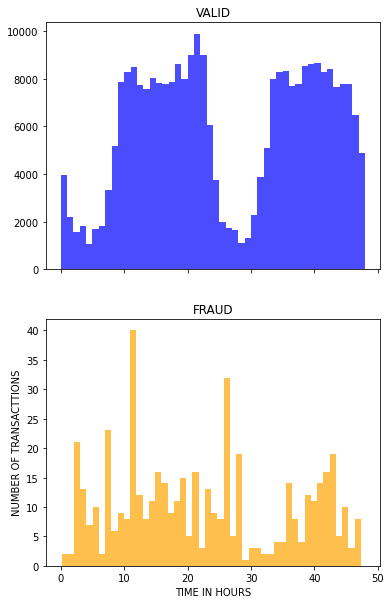

In [26]:
#Lets check whether the feature Time has anything to do wtih the frauds.

print("TIME FEATURE")
cred["HOURS"] = cred["Time"]/3600 # convert to hours
print(cred["HOURS"].tail(5))

fig, (ax1, ax2) = pylt.subplots(2, 1, sharex = True, figsize=(6,10))
ax1.hist(cred.HOURS[cred.Class==0],bins=48,color='blue',alpha=0.7)
ax1.set_title('VALID')

ax2.hist(cred.HOURS[cred.Class==1],bins=48,color='orange',alpha=0.7)
ax2.set_title('FRAUD')

pylt.xlabel('TIME IN HOURS')
pylt.ylabel('NUMBER OF TRANSACTTIONS')

In [27]:
#So we saw that Time has no effect on the frauds. Thus , we will drop it.

cred = cred.drop(['Time'],axis = 1)

Text(0, 0.5, 'No. of transactions')

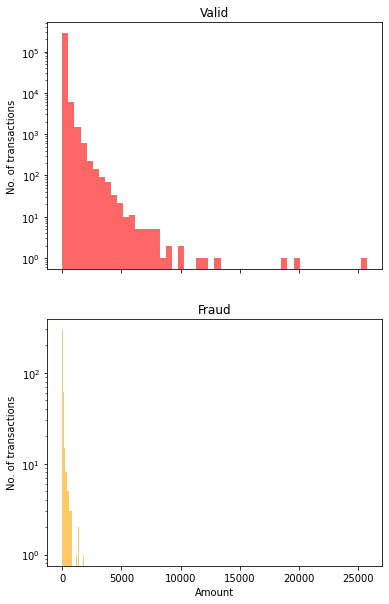

In [28]:
#Lets check this time, whether the feature Smount has anything to do wtih frauds.

fig, (ax3,ax4) = pylt.subplots(2,1, figsize = (6,10), sharex = True)
ax3.hist(cred.Amount[cred.Class==0],bins=50,color='red',alpha=0.6)
ax3.set_yscale('log')
ax3.set_title('Valid')
ax3.set_ylabel('No. of transactions')

ax4.hist(cred.Amount[cred.Class==1],bins=50,color='orange',alpha=0.6)
ax4.set_yscale('log')
ax4.set_title('Fraud')
ax4.set_xlabel('Amount')
ax4.set_ylabel('No. of transactions')

In [29]:
#Lets just Standardize the Amount feature.

from sklearn.preprocessing import StandardScaler
cred['SCALED_AMT'] = StandardScaler().fit_transform(cred['Amount'].values.reshape(-1,1))
cred = cred.drop(['Amount'],axis=1)

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

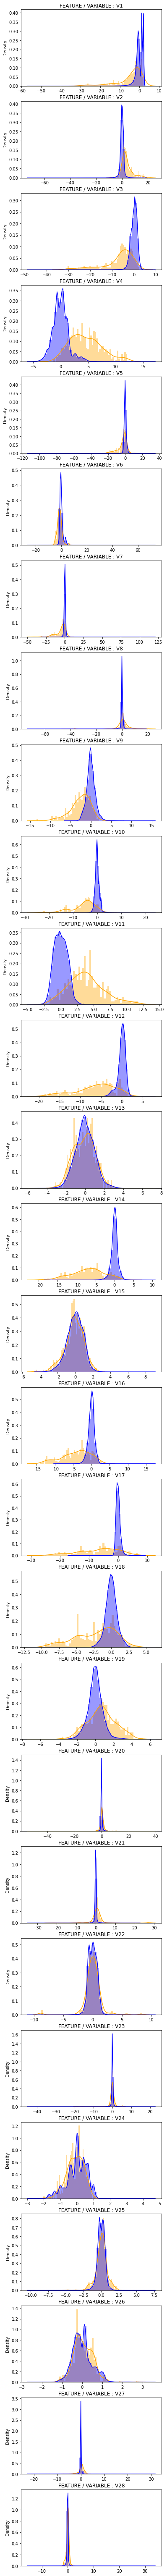

In [30]:
#Lets check the correlations among the features - the results obtained from PCA transformation.
#Those are - V1,V2,.....,V28 (total 28 columns).

import seaborn as sbn
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
pylt.figure(figsize=(6,28*4))
for i, col in enumerate(cred[cred.iloc[:,0:28].columns]):
    ax5 = pylt.subplot(gs[i])
    sbn.distplot(cred[col][cred.Class == 1], bins=50, color='orange')
    sbn.distplot(cred[col][cred.Class == 0], bins=50, color='blue')
    ax5.set_xlabel('')
    ax5.set_title('FEATURE / VARIABLE : ' + str(col))
pylt.show()

In [38]:
#Now , lets just split the data in the dataset into training data and testing data. The ratio
#we are taking here will be 4:1 for testing and training data ,respectively.

def split_data(cred, drop_list):
    cred = cred.drop(drop_list,axis=1)
    print(cred.columns)

    #test-train data splitting
    from sklearn.model_selection import train_test_split
    Y = cred['Class'].values
    X = cred.drop(['Class'],axis=1).values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=42, stratify=Y)

    print("training-set-data size : ", len(Y_train),
      "\ntesting-set_data size : ", len(Y_test))
    print("fraud cases in test-set-data obtained : ", sum(Y_test))
    return X_train, X_test, Y_train, Y_test

In [39]:
#Creating Classifier

def get_predictions(classf, X_train, y_train, X_test):
    classf = classf
    classf.fit(X_train,Y_train)
    Y_predict = classf.predict(X_test)
    Y_predict_prob = classf.predict_proba(X_test)
    train_predict = classf.predict(X_train)

    print('training-set-data confusion matrix:\n', confusion_matrix(Y_train,train_predict)) 
    return Y_predict, Y_predict_prob

In [40]:
#Lets obtain the scores via metrics

def print_scores(Y_test,Y_predict,Y_predict_prob):
    print('testing-set-data confusion matrix : \n', confusion_matrix(Y_test,Y_predict)) 
    print("recall : ", recall_score(Y_test,Y_predict))
    print("precision : ", precision_score(Y_test,Y_predict))
    print("F1_score : ", f1_score(Y_test,Y_predict))
    print("accuracy : ", accuracy_score(Y_test,Y_predict))

In [41]:
#Let us see what will happen if some features are dropped one by one to check 
#the classifier sensitivity. And the we shall see the metrics' scores

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# CASE - 1 : DROP NOTHING
drop_list = []
X_train, X_test, Y_train, Y_test = split_data(cred, drop_list)
Y_predict, Y_predict_prob = get_predictions(GaussianNB(), X_train, Y_train, X_test)
print_scores(Y_test,Y_predict,Y_predict_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'HOURS',
       'SCALED_AMT'],
      dtype='object')
training-set-data size :  227845 
testing-set_data size :  56962
fraud cases in test-set-data obtained :  98
training-set-data confusion matrix:
 [[222480   4971]
 [    69    325]]
testing-set-data confusion matrix : 
 [[55535  1329]
 [   15    83]]
recall :  0.8469387755102041
precision :  0.058781869688385266
F1_score :  0.10993377483443707
accuracy :  0.9764053228468101


In [42]:
#Here , if scores are converted to percentages (approximately) --

'''
Accuracy = 97.64%
Precision = 5.88%
ReCall = 84.69%
F1_Score = 10.99%
'''

'\nAccuracy = 97.64%\nPrecision = 5.88%\nReCall = 84.69%\nF1_Score = 10.99%\n'

In [43]:
# CASE - 2 : DROP MAIN COMPONENTS WITH SAME DISTROs

drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, Y_train, Y_test = split_data(cred, drop_list)
Y_predict, Y_predict_prob = get_predictions(GaussianNB(), X_train, Y_train, X_test)
print_scores(Y_test,Y_predict,Y_predict_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'HOURS',
       'SCALED_AMT'],
      dtype='object')
training-set-data size :  227845 
testing-set_data size :  56962
fraud cases in test-set-data obtained :  98
training-set-data confusion matrix:
 [[223967   3484]
 [    61    333]]
testing-set-data confusion matrix : 
 [[55935   929]
 [   12    86]]
recall :  0.8775510204081632
precision :  0.08472906403940887
F1_score :  0.15453728661275834
accuracy :  0.9834802148800955


In [44]:
#Here , if scores are converted to percentages (approximately) --

'''
Accuracy = 98.34%
Precision = 8.47%
ReCall = 87.76%
F1_Score = 15.45%
'''

'\nAccuracy = 97.64%\nPrecision = 5.88%\nReCall = 84.69%\nF1_Score = 10.99%\n'

In [45]:
# CASE - 3 : DROP MAIN COMPONENTS AND TIME

drop_list = ['HOURS','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, Y_train, Y_test = split_data(cred, drop_list)
Y_predict, Y_predict_prob = get_predictions(GaussianNB(), X_train, Y_train, X_test)
print_scores(Y_test,Y_predict,Y_predict_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'SCALED_AMT'],
      dtype='object')
training-set-data size :  227845 
testing-set_data size :  56962
fraud cases in test-set-data obtained :  98
training-set-data confusion matrix:
 [[223964   3487]
 [    60    334]]
testing-set-data confusion matrix : 
 [[55936   928]
 [   12    86]]
recall :  0.8775510204081632
precision :  0.08481262327416174
F1_score :  0.15467625899280577
accuracy :  0.9834977704434535


In [46]:
#Here , if scores are converted to percentages (approximately) --

'''
Accuracy = 98.34%
Precision = 8.48%
ReCall = 87.76%
F1_Score = 15.47%
'''

#Thus , we can safely remove Time feature as nothing much has changed - it's all the same !

'\nAccuracy = 97.64%\nPrecision = 5.88%\nReCall = 84.69%\nF1_Score = 10.99%\n'

In [49]:
# CASE - 4 : DROP MAIN COMPONENTS AND TIME AND SCALED_AMT (AMOUNT)

drop_list = ['SCALED_AMT','HOURS','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, Y_train, Y_test = split_data(cred, drop_list)
Y_predict, Y_predict_prob = get_predictions(GaussianNB(), X_train, Y_train, Y_test)
print_scores(Y_test,Y_predict,Y_predict_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
training-set-data size :  227845 
testing-set_data size :  56962
fraud cases in test-set-data obtained :  98


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
cred = cred.drop(drop_list , axis = 1)
print(cred.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


In [ ]:
#Thus , after going through some cases , I conclude the Naive Bayes Classifier component
#Along with the scores via metrics.